<a href="https://colab.research.google.com/github/rmd-davis/ML-intro/blob/main/05_housing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Intro to Machine Learning - Classification
Using the The Ames Housing dataset compiled by Dean De Cock.

In this notebook, we will look at how to apply classification.

In [1]:
# Import necessary packages

# Pandas to handle the data
import pandas as pd

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context('notebook')

# Scipy for linear regression
import scipy

# SciKit-Learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Import Data

In [4]:
included_columns = included_columns = ['SalePrice','OverallCond','YearBuilt','GrLivArea','Fireplaces','GarageArea', 'TotalBsmtSF','FullBath','LotArea']

data = pd.read_csv('https://raw.githubusercontent.com/rmd-davis/ML-intro/main/data/housing_data.csv', usecols = included_columns)

In [5]:
data

,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
0,9473,5,2002,1128.0,2031,2,1,577.0,237000
1,3606,5,2006,1352.0,1352,2,1,466.0,194000
2,17217,5,2006,1140.0,1140,1,0,0.0,84500
3,4385,5,2001,1419.0,1419,1,1,588.0,290000
4,10140,6,1975,1056.0,1074,1,0,495.0,153500
...,...,...,...,...,...,...,...,...,...
2046,10261,5,2000,936.0,1792,2,1,451.0,186500
2047,9920,5,1996,1117.0,2013,2,1,455.0,269790
2048,8499,5,2006,616.0,1412,2,1,432.0,156932
2049,9020,7,1966,1127.0,1165,1,0,490.0,174900


### Data Cleaning

In [12]:
# Check for missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2051 non-null   int64  
 1   OverallCond  2051 non-null   int64  
 2   YearBuilt    2051 non-null   int64  
 3   TotalBsmtSF  2051 non-null   float64
 4   GrLivArea    2051 non-null   int64  
 5   FullBath     2051 non-null   int64  
 6   Fireplaces   2051 non-null   int64  
 7   GarageArea   2050 non-null   float64
 8   SalePrice    2051 non-null   int64  
 9   in_budget    2051 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 160.4 KB


In [13]:
# Fix the missing value in 'GarageArea' with the mean value in the column

data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mean())

## Data Engineering

* Define which homes are within our budget of \$170,000 to \$190,000
* We do not need to scale data since we will be using a Decision Tree classifier

### Define 'in_budget' houses
Since we want to classify houses as 'in_budget', we will mark all the houses with a SalePrice between \$170,000 and \$190,000 with a '1'. Houses outside our budget will be marked with a '0'.

In [14]:
# Create a function for checking if houses are in our budget

def in_budget(x):
    lower = 170000
    upper = 190000

    if x >= lower and x<= upper:
        return 1
    else:
        return 0

In [16]:
# Apply the function
data['in_budget'] = data['SalePrice'].apply(in_budget)

# Drop the old 'SalePrice' column since we no longer need it
data = data.drop(columns=['SalePrice'])

# Inspect the values in the 'in_budget' column
data['in_budget'].value_counts()

0    1794
1     257
Name: in_budget, dtype: int64

## Modelling

### Splitting the data

In [45]:
# First, split the data into FEATURES and the TARGET VARIABLE
X = data.drop(columns= ['in_budget'])   # The FEATURES is everything except for the 'in_budget' column
y = data['in_budget']                   # The TARGET VARIABLE is the 'in_budget' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
y_train.value_counts()

0    1273
1     162
Name: in_budget, dtype: int64

In [23]:
y_test.value_counts()

0    521
1     95
Name: in_budget, dtype: int64

### Decision Tree

In [29]:
classifier_dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=5, max_leaf_nodes=5,class_weight='balanced')
classifier_dt.fit(X_train, y_train)



DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

## Model performance

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_dt = classifier_dt.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

print('Classification Report:')
print(classification_report(y_test, y_pred_dt, target_names=['0','1']))

Confusion Matrix:
[[345 176]
 [  8  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       521
           1       0.33      0.92      0.49        95

    accuracy                           0.70       616
   macro avg       0.65      0.79      0.64       616
weighted avg       0.88      0.70      0.74       616



### Visualize decision tree

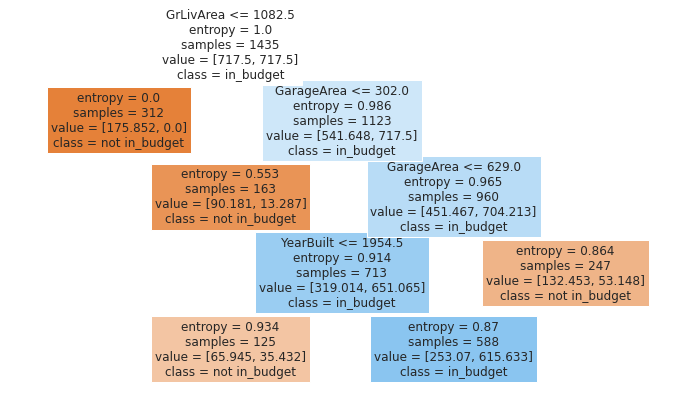

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = data.columns
class_names = ['not in_budget','in_budget']

plt.figure(figsize=(12, 7));
tree.plot_tree(classifier_dt, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12);

## Hyperparameter tuning

BUT, we can do better than an F1 score of 0.64.
<br>To do that, we use hyperparameter tuning to find a much better model by training a bunch of different models and comparing their results to each other.

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

classifier_dt_tuned = DecisionTreeClassifier(random_state=42)

params = {"criterion": ["gini", "entropy"],
          "splitter": ["best", "random"],
          "class_weight": ['balanced', None], 
          "max_depth": randint(2, 21),
          "min_samples_leaf": randint(1, 11),
          "max_features": uniform(0.0, 1.0)}

search = RandomizedSearchCV(classifier_dt_tuned, param_distributions=params, n_iter=1000, scoring='f1_macro', cv=10, verbose=2)
search = search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV] END class_weight=None, criterion=gini, max_depth=7, max_features=0.28425098940949733, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_features=0.28425098940949733, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_features=0.28425098940949733, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_features=0.28425098940949733, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_features=0.28425098940949733, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_features=0.28425098940949733, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_featur

In [33]:
search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 0.9485034922565603,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [34]:
y_pred_dt_tuned = search.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt_tuned))

print('Classification Report:')
print(classification_report(y_test, y_pred_dt_tuned, target_names=['0','1']))

Confusion Matrix:
[[464  57]
 [ 25  70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       521
           1       0.55      0.74      0.63        95

    accuracy                           0.87       616
   macro avg       0.75      0.81      0.77       616
weighted avg       0.89      0.87      0.87       616



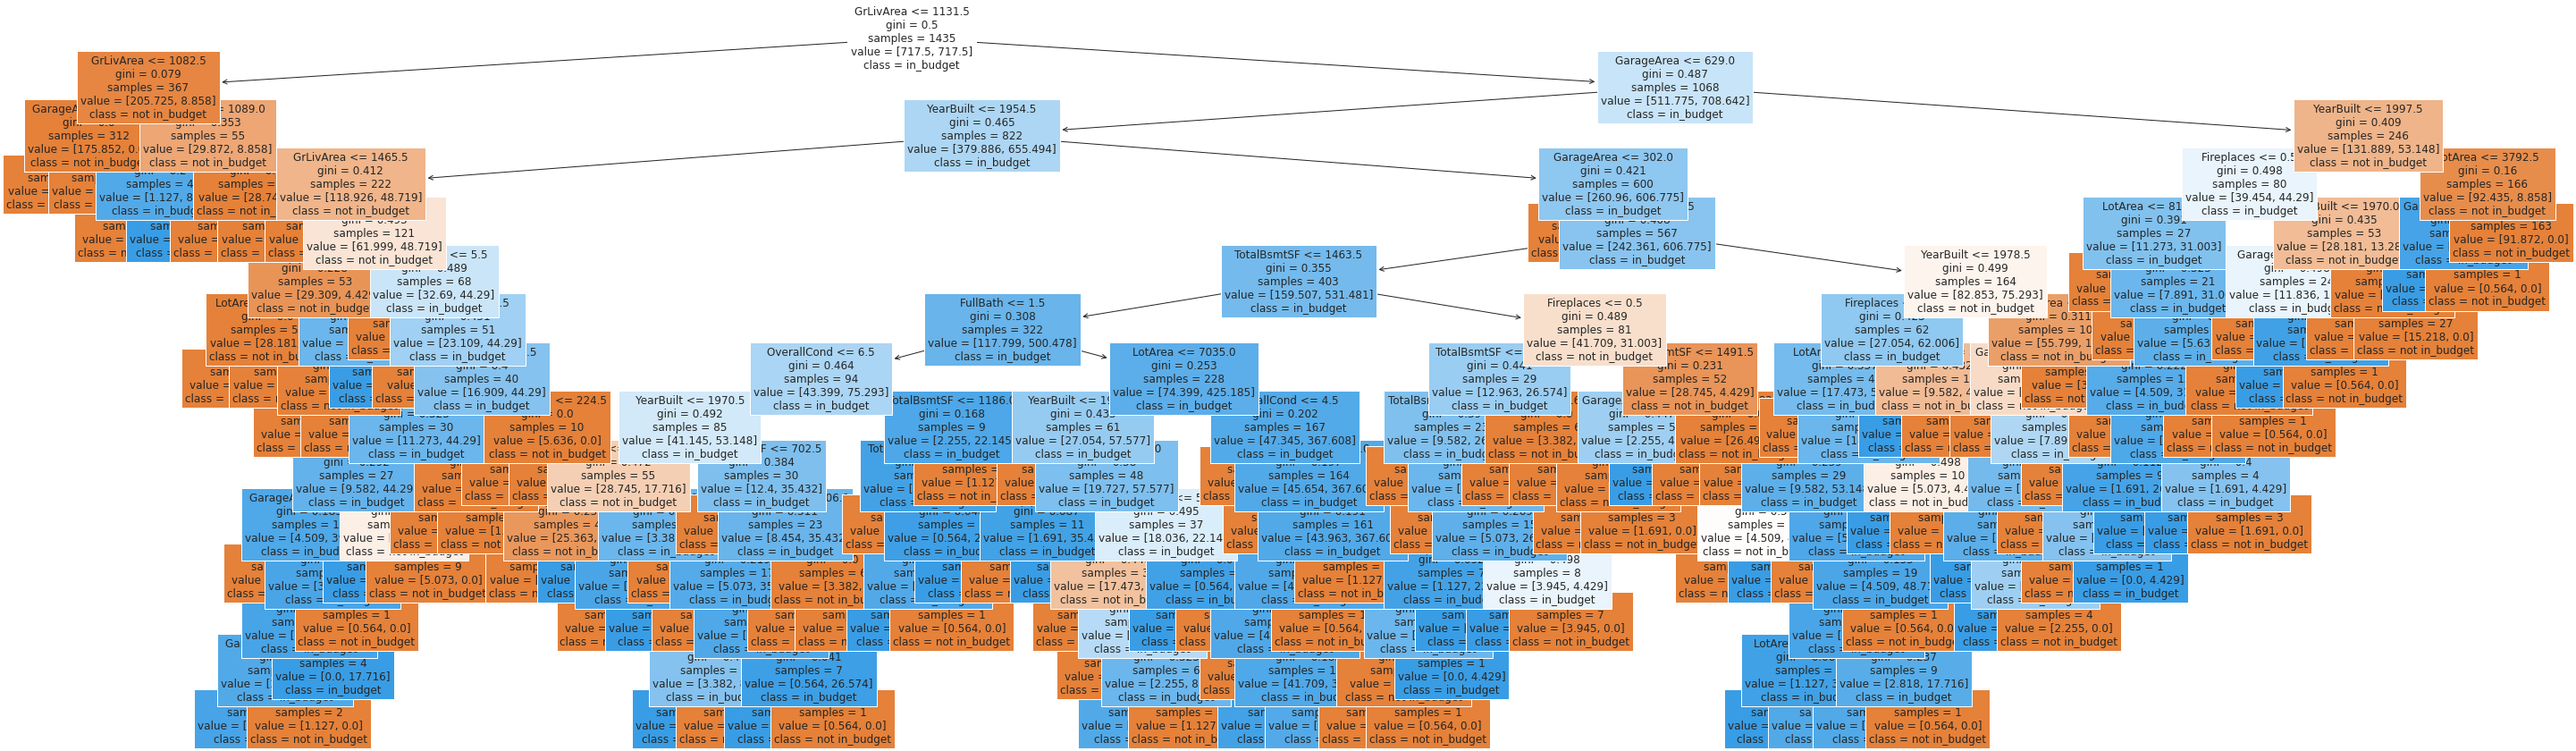

In [35]:
plt.figure(figsize=(50, 15));
tree.plot_tree(search.best_estimator_, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12);

# Kaggle Competition

In [71]:
# Load the Kaggle test data

included_columns = included_columns = ['Id','OverallCond','YearBuilt','GrLivArea','Fireplaces','GarageArea', 'TotalBsmtSF','FullBath','LotArea']

kaggle_test_data = pd.read_csv('https://raw.githubusercontent.com/rmd-davis/ML-intro/main/data/housing_data_test.csv', usecols = included_columns)

In [72]:
# Inspect Kaggle test data. The prediction engine doesn't like missing data.
kaggle_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           879 non-null    int64  
 1   LotArea      879 non-null    int64  
 2   OverallCond  879 non-null    int64  
 3   YearBuilt    879 non-null    int64  
 4   TotalBsmtSF  878 non-null    float64
 5   GrLivArea    879 non-null    int64  
 6   FullBath     879 non-null    int64  
 7   Fireplaces   879 non-null    int64  
 8   GarageArea   879 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 61.9 KB


In [73]:
# Fix the missing value in 'TotalBsmtSF' with the mean value in the column

kaggle_test_data['TotalBsmtSF'] = kaggle_test_data['TotalBsmtSF'].fillna(kaggle_test_data['TotalBsmtSF'].mean())

### Predict on test data

In [74]:
# Define which data is used for the prediction
kaggle_test_data_X = kaggle_test_data.drop(columns='Id')

# Create a new dataframe from the test data and append the 'in_budget' prediction
kaggle_predictions = kaggle_test_data.copy()
kaggle_predictions['in_budget'] = search.predict(kaggle_test_data_X)

# Display the result
kaggle_predictions


,Id,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,in_budget
0,2755,11210,5,2005,1614.0,1614,2,0,865.0,0
1,16,53504,5,2003,1650.0,3279,3,1,841.0,0
2,2736,19690,7,1966,697.0,2201,2,1,432.0,0
3,188,7407,7,1957,912.0,1236,1,0,923.0,0
4,435,11578,5,2008,1736.0,1736,2,1,834.0,0
...,...,...,...,...,...,...,...,...,...,...
874,2487,9100,5,1963,1728.0,1728,2,0,504.0,0
875,801,19255,5,1983,520.0,1338,1,1,576.0,0
876,2710,11777,6,1966,1164.0,1320,1,2,564.0,0
877,1310,5350,8,1920,624.0,1450,1,0,288.0,0


In [75]:
# Since we don't see any 'in_budget' == 1 rows, let's look at the value counts
kaggle_predictions['in_budget'].value_counts()

0    742
1    137
Name: in_budget, dtype: int64

In [76]:
# Looks good, let's export the result to a csv so we can submit it to the Kaggle competition at https://www.kaggle.com/t/6da1c6552e424a49965da9992f5cf840

kaggle_predictions = kaggle_predictions[['Id','in_budget']]
kaggle_predictions.columns = ['id', 'in_budget']

kaggle_predictions.to_csv('submission_01.csv', index=False)

In [77]:
# Run this cell to download the submission so you can upload it to Kaggle

from google.colab import files

files.download('submission_01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>